In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

No GPU, using /device:CPU:0.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/AgriWise/ML/Soil Quality - Fertility'

/content/drive/.shortcut-targets-by-id/1nNpHsxhVob0qpN6DIX6h02v09VRuwzHw/AgriWise/ML/Soil Quality - Fertility


# Discover and Visualize the Data to Gain Insights

In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('Soil Fertility Data.csv')
data.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          1288 non-null   int64  
 1   P          1288 non-null   float64
 2   K          1288 non-null   int64  
 3   ph         1288 non-null   float64
 4   ec         1288 non-null   float64
 5   oc         1288 non-null   float64
 6   S          1288 non-null   float64
 7   zn         1288 non-null   float64
 8   fe         1288 non-null   float64
 9   cu         1288 non-null   float64
 10  Mn         1288 non-null   float64
 11  B          1288 non-null   float64
 12  fertility  1288 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 130.9 KB


There are not null values

In [11]:
# data.drop_duplicates()
data.describe()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
count,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000,1288.000000
mean,269.061335,17.643478,497.135093,7.549130,0.535893,0.632174,7.122888,0.442811,4.119185,0.911281,8.601530,0.611957,1.035714
std,80.542499,25.303343,120.887088,0.507163,0.134156,0.720488,4.026723,1.568333,3.028314,0.448782,4.466209,0.560781,0.810938
min,6.000000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,207.000000,7.200000,422.000000,7.340000,0.430000,0.390000,4.520000,0.280000,1.360000,0.600000,6.045000,0.290000,0.000000
50%,289.000000,9.200000,465.000000,7.500000,0.530000,0.620000,6.330000,0.360000,3.740000,0.890000,8.540000,0.420000,1.000000
75%,333.000000,13.800000,570.000000,7.700000,0.630000,0.832500,8.450000,0.480000,6.320000,1.250000,11.560000,0.650000,2.000000
max,383.000000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


In [12]:
data['fertility'].value_counts()

2    447
1    440
0    401
Name: fertility, dtype: int64

- 0 describes low-fertility
- 1 describes medium-fertility
- 2 describes high-fertility

In [13]:
work_data = data.copy()
work_data.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B,fertility
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82,0


In [14]:
y = work_data[['fertility']]
X = work_data.drop('fertility', axis=1)

In [15]:
X.head()

,N,P,K,ph,ec,oc,S,zn,fe,cu,Mn,B
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82
4,220,8.6,444,7.43,0.65,0.72,11.7,0.37,0.66,0.90,2.19,1.82


In [16]:
y.head()

,fertility
0,0
1,0
2,0
3,0
4,0


In [17]:
corr = X.corr()

<Axes: >

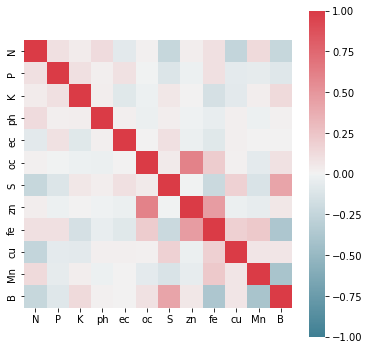

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

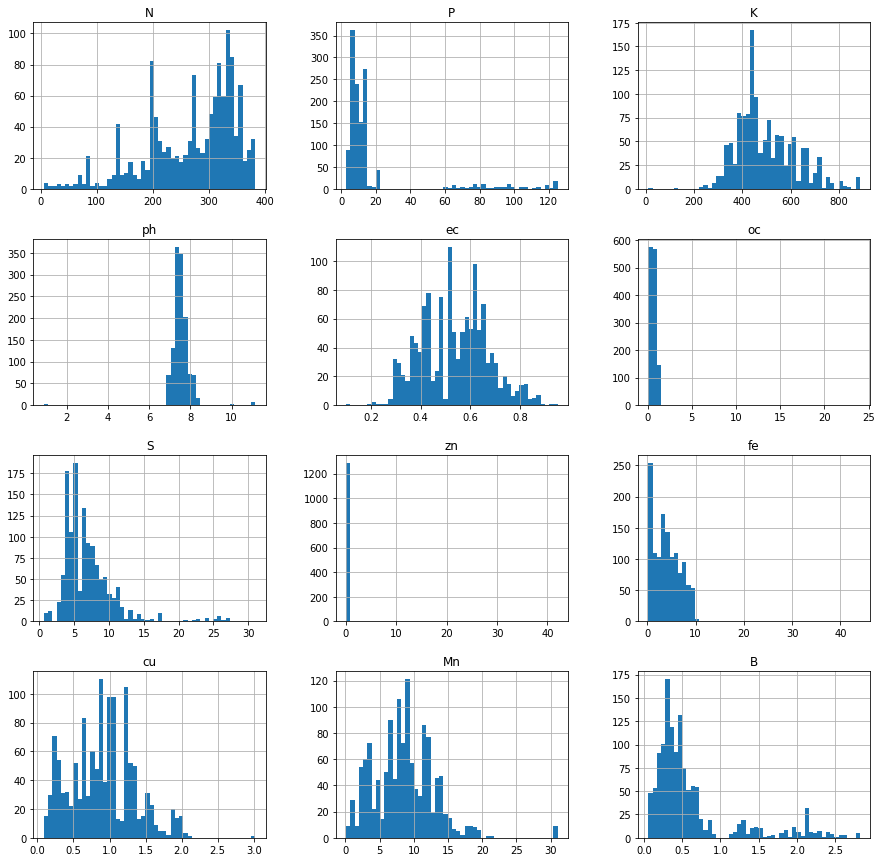

In [19]:
X.hist(bins=50, figsize=(15,15))
plt.show()

# Prepare the Data for Machine Learning Algorithms

### Feature Scaling

In [20]:
transformed_X = X.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

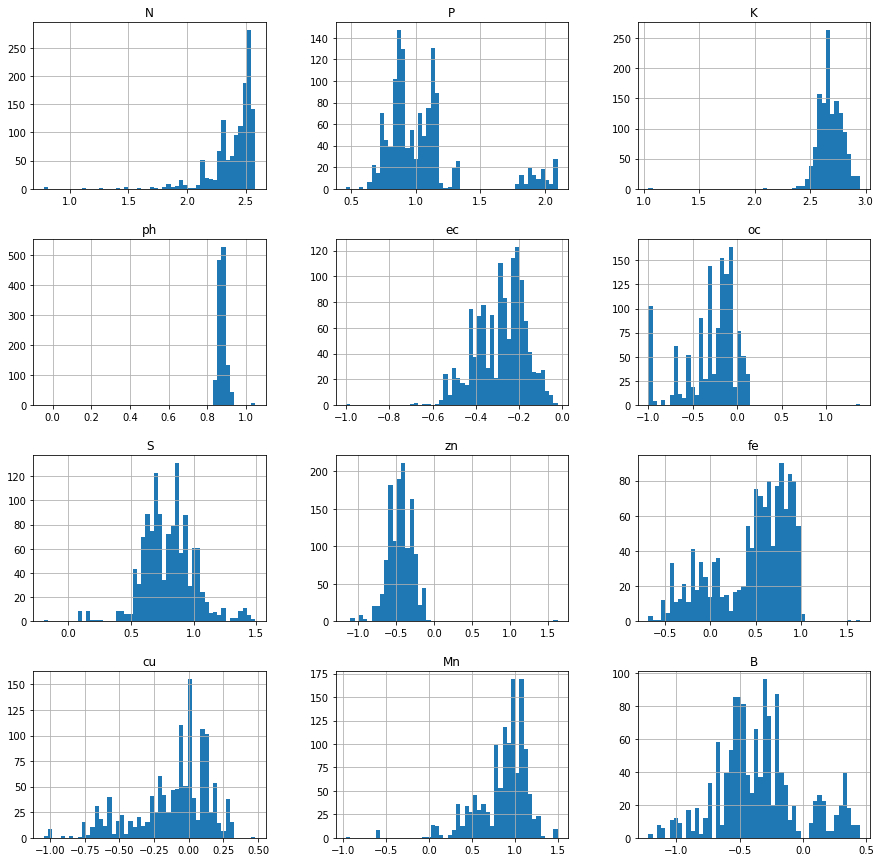

In [21]:
transformed_X.hist(bins=50, figsize=(15,15))
plt.show()

# Select and Train a Model

### Splitting data into train and val

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 42)
X_train.shape

(1030, 12)

In [44]:
from sklearn import tree, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [45]:
y_train_ravel = y_train.values.ravel()

In [46]:
svcClf = SVC()
svcClf.fit(X_train, y_train_ravel)
svc_pred = svcClf.predict(X_val)

In [47]:
forestClf = ensemble.RandomForestClassifier()
forestClf.fit(X_train, y_train_ravel)
forest_pred = forestClf.predict(X_val)

In [48]:
nbClf = GaussianNB()
nbClf.fit(X_train, y_train_ravel)
nb_pred = nbClf.predict(X_val)

In [49]:
knnClf = KNeighborsClassifier()
knnClf.fit(X_train, y_train_ravel)
knn_pred = knnClf.predict(X_val)

In [50]:
treeClf = tree.DecisionTreeClassifier()
treeClf.fit(X_train, y_train_ravel)
tree_pred = treeClf.predict(X_val)

SVC  accuarcy is  0.7596899224806202
RandomForestClassifier  accuarcy is  0.9728682170542635
GaussianNB  accuarcy is  0.6007751937984496
KNeighborsClassifier  accuarcy is  0.8798449612403101
DecisionTreeClassifier  accuarcy is  0.9457364341085271


<Axes: >

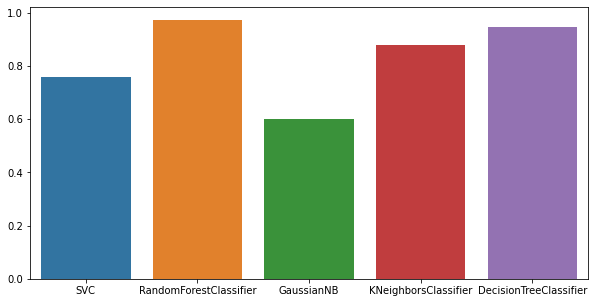

In [51]:
from sklearn.metrics import accuracy_score

models = [svcClf, forestClf, nbClf, knnClf, treeClf]
accs = []
titles = []

for model in models:
    pred = model.predict(X_val)
    model_acc = accuracy_score(y_val, pred)
    accs.append(model_acc)
    titles.append(type(model).__name__)
    print(type(model).__name__, " accuarcy is ", model_acc)

fig = plt.figure(figsize=(10, 5))
sns.barplot(x = titles, y=accs)

### Pros & Cons
**SVC**
1. clear margin of separation between classes
2. more effective in high dimensional spaces
3. effective in cases where the number of dimensions is greater than the number of samples
4. memory efficient                                                                                                          
5. not suitable for large data sets                                                                                          

**Random Forest Classifier**
1. quite fast
2. able to deal with unbalanced and missing data
3. may over-fit data sets that are particularly noisy
4. data-hungry

**GaussianNB**
1. very fast 
2. better than other models with less training data if the assumption of independence of features holds
3. If you have categorical input variables, the Naive Bayes algorithm performs exceptionally well in comparison to numerical variables
4. effectively works in Multi-class predictions.

**KNeighborsClassifier**
1. robust to noisy data
2. effective if the training data is large

**DecisionTreeClassifier**
1. does not require normalization of data
2. does not require scaling of data as well
3. higher time to train the model

In [52]:
forest = ensemble.RandomForestClassifier(random_state=42)

In [53]:
param_grid = { 
    'n_estimators': [200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6 ,7 ,8, 9, 10],
    'criterion' :['gini', 'entropy']
}

In [54]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 5)
clf.fit(X_train, y_train_ravel)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500]})

In [55]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

# Training the model

In [56]:
model = ensemble.RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 max_features = 'auto',
 n_estimators = 200, random_state=42)

In [57]:
model.fit(X_train, y_train_ravel)

RandomForestClassifier(max_depth=10, max_features='auto', n_estimators=200,
                       random_state=42)

In [58]:
preds = model.predict(X_val)

In [59]:
import warnings
warnings.filterwarnings('always') 
warnings.filterwarnings('ignore')

In [60]:
from sklearn.metrics import classification_report

report = classification_report(y_val, preds)
report

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96        86\n           1       0.97      0.95      0.96        87\n           2       1.00      1.00      1.00        85\n\n    accuracy                           0.97       258\n   macro avg       0.97      0.97      0.97       258\nweighted avg       0.97      0.97      0.97       258\n'

In [61]:
mode_acc = accuracy_score(y_val, preds)
mode_acc

0.9728682170542635

### Save model as pkl

In [62]:
import pickle

with open('random_forest_pkl.pkl', 'wb') as file:
  pickle.dump(model, file)

### Load model

In [63]:
with open('random_forest_pkl.pkl', 'rb') as file:
  model = pickle.load(file)